# Polars - A blazingly fast new Dataframe library

![polars](https://www.ritchievink.com/img/post-34-polars/polars.webp)

In this article we going to take a closer look at [Polars](https://github.com/ritchie46/polars). Polars is a new Dataframe library implemented in Rust with convenient Python bindings. The [benchmark of H2Oai](https://h2oai.github.io/db-benchmark/) shows that it is one of the fastest Dataframe library of the moment. From the Polars book: '_The goal of Polars is being a fast DataFrame library that utilizes the available cores on your machine. Its ideal use case is data too big for pandas and too small for spark. Similar to spark Polars consists of a query planner that may (and probably does) optimize your query in order to do less work or reduce memory usage._'

Polars offers both a eager and a lazy API. The lazy API is said to be 'somewhat similar to spark'. The lazy API allows the user to optimise the query before it is ran. Promising 'blazingly' fast performance.

In this article we will do first introduction and work with some of the available functionalities of this new Dataframe package and see what it has to offer.

To explore the functionalities of Polars we are going to use the [Wine Review dataset](https://www.kaggle.com/zynicide/wine-reviews/) with 150k wine reviews with variety, location, winery, price, and descriptions.

You can download the dataset that we will use [on Kaggle](https://www.kaggle.com/zynicide/wine-reviews/?select=winemag-data_first150k.csv).

It is also possible to run the cells in this article by yourself and play around with code along the way. You can find this article in Jupyter notebook form on my [Github page](https://github.com/r-brink/polars-tutorial/blob/master/polars-tutorial.ipynb)

## Installing Polars

We can easily install Polars via Pypi with the following command 

`pip install polars==0.7.0`

In this article we will specifically use the 0.7.0 release of Polars, because it is one the more stable versions. It is still in an early stage of development, so a lot may change till the first true stable version 1.0.

*Note: as a best practice, don't forget to create and activate your virtual environment before installing Polars*

## Import relevant packages

To work with Polars and start analysing the Wine Review dataset we are going to import two packages: Polars and Matplotlib. We notice that Polars only installs `numpy` and `pyarrow` making it relatively small compared with other Dataframe libaries.

In [5]:
import polars as pl
import matplotlib.pyplot as plt
%matplotlib inline

Polars already offers many functionalities that we are already familiar if you have worked with Pandas before. We can find an overview, including examples (for most) in the [reference guide](https://ritchie46.github.io/polars/python/polars/index.html). 

Let's start with reading in the dataset and start with our analyses.

In [6]:
data = pl.read_csv('winemag-data.csv')
print(type(data))

<class 'polars.frame.DataFrame'>


Now that the data is read. Let's have a closer look at the Dataframe

In [7]:
data.shape

(150930, 11)

In [8]:
data.columns

['',
 'country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'variety',
 'winery']

Below we use sample() to get random rows from the dataset to get a feeling of the data that is available. Polars also offers common functions like `head` and `tail` 

In [9]:
data.sample(n=5)



,country,description,designation,points,price,province,region_1,region_2,variety,winery
i64,str,str,str,i64,f64,str,str,str,str,str
110756,"""US""","""Cassis, menthol, black olive, and some alfalfa make for a complex bouquet. It's undoubtedly forward—red fruit, chocolate and vanilla on the palate—with a piercing quality that could subside with age. This wine has the stuff to please: it's round, mouthfilling and very correct.""","""""",91,65,"""Central Italy""","""Montepulciano d'Abruzzo""","""""","""Barbera""","""Chapelle d'Ausone"""
66259,"""US""","""This is a ripe and jammy expression of Barbera d'Asti that offers sweet aromas of blackberry, strawberry and blueberry preserves. All that mature fruit is nicely balanced by bright acidity in the mouth.""","""Old School House""",87,17,"""Tuscany""","""""","""Oregon Other""","""Sangiovese""","""Cairdean Estate"""
81086,"""France""","""A powerful wine—this has plenty of weight and tannic structure. It also has a lively red-fruit character that comes through with acidity. There is a muscular feel to this wine, one that promises ageability.""","""""",93,11,"""Mendoza Province""","""Barolo""","""""","""Garnacha-Syrah""","""Fisher"""
38215,"""Austria""","""This is a Bordeaux blend based on Cabernet Sauvignon, with a good chunk of Sangiovese. It's a pleasant, rich wine, tough in tannins and acids, with concentrated cherry pie, blackberry and oak flavors. Doesn't seem like an ager, so drink now with hearty foods.""","""Glacier Ridge Vineyards""",87,8,"""California""","""Monterey""","""""","""Castelão""","""Cecchi"""
135827,"""US""","""Aromas of hazelnut, mineral and pear lead to off-dry, full-feeling fruit flavors that are stitched up with citric acidity on the finish. It doesn't entirely come together but there's plenty to enjoy.""","""Riesling""",90,40,"""Tuscany""","""Spain""","""""","""Roussanne""","""Mirassou"""


The dataset has a lot to offer. With 11 variables and over 150k rows there is a lot of data to analyse. We see a couple of variables that are interesting to look into, like `price`, `country`, `points`.

Before we continue we want to have a closer look if there are any `Nulls` in the dataset.

In [10]:
data.null_count()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,13695,0,0,0,0,0


It seems that around a little less than 10% of the `price` variable has no value. We can either drop the rows with missing values or fill them. In this article, we will choose to use the mean as filling strategy. Let's have a look at the impact of this strategy.

In [11]:
# current average price in the dataset, before filling the Nones
data['price'].mean()

30.125216988007686

In [12]:
data['price'] = data['price'].fill_none('mean')

In [13]:
data.null_count()

,country,description,designation,points,province,region_1,region_2,variety,winery,price
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0


In [14]:
#new average price of the wines in the dataset
data['price'].mean()

33.131482493532864

We see that the average price has increased with $3, which is fine for this walkthrough.

The next step is dive in a little deeper and have a closer look at the dataset with some more complex functions.

The goal that we want to achieve in the following part is to have a closer look at the countries and how they compare in terms of price and points.

In [15]:
# Get a list of unique countries that are in the dataset
data['country'].unique().to_list()


['Macedonia',
 'Hungary',
 'Australia',
 'Switzerland',
 'Montenegro',
 'Austria',
 'Bulgaria',
 'Czech Republic',
 'South Africa',
 'New Zealand',
 'Israel',
 'Serbia',
 'US-France',
 'Slovakia',
 'South Korea',
 'Georgia',
 'Spain',
 'China',
 'England',
 'Lebanon',
 'Turkey',
 'Uruguay',
 'Portugal',
 'Argentina',
 'Cyprus',
 'US',
 '',
 'Brazil',
 'Mexico',
 'India',
 'Canada',
 'Luxembourg',
 'Lithuania',
 'Italy',
 'Moldova',
 'Albania',
 'Japan',
 'Croatia',
 'France',
 'Egypt',
 'Bosnia and Herzegovina',
 'Morocco',
 'Greece',
 'Ukraine',
 'Slovenia',
 'Chile',
 'Romania',
 'Germany',
 'Tunisia']

In [16]:
print(f'There are {len(data["country"].unique())} countries in the list')

There are 49 countries in the list


It seems that there is an undefined country ('') and a country called 'US-France' in our list.

In [17]:
data[(data['country'] == '') | (data['country'] == 'US-France')]

,country,description,designation,points,province,region_1,region_2,variety,winery,price
i64,str,str,str,i64,str,str,str,str,str,f64
1133,"""""","""Delicate white flowers and a spin of lemon peel on the nose start this refined white. The bright fruit on the palate is tropical and exotic, but the minerality gives it lift. Fuller-bodied but poised, the wine has aging potential and a food-friendly character.""","""Askitikos""",90,"""""","""""","""""","""Assyrtiko""","""Tsililis""",17
1440,"""""","""A blend of 60% Syrah, 30% Cabernet Sauvignon and 10% Merlot, this inky garnet-colored wine offers aromas of cassis and elderberry. On the palate, there is a combination of cooked fruit and cool spice flavors yet there is no lack of accompanying acidity. Flavors of cassis, elderberry, anise, orange peel and vanilla are backed by silky tannins that stay smooth into the cooling finish.""","""Shah""",90,"""""","""""","""""","""Red Blend""","""Büyülübağ""",30
68226,"""""","""From first sniff to last, the nose never makes much of an impression; the wine has funk and generic chemical aromas but also your basic red apple and char. Pretty big and aggressive in the mouth, with snaggy acids and rough tannins.""","""Piedra Feliz""",81,"""""","""""","""""","""Pinot Noir""","""Chilcas""",15
113016,"""""","""From first sniff to last, the nose never makes much of an impression; the wine has funk and generic chemical aromas but also your basic red apple and char. Pretty big and aggressive in the mouth, with snaggy acids and rough tannins.""","""Piedra Feliz""",81,"""""","""""","""""","""Pinot Noir""","""Chilcas""",15
135696,"""""","""From first sniff to last, the nose never makes much of an impression; the wine has funk and generic chemical aromas but also your basic red apple and char. Pretty big and aggressive in the mouth, with snaggy acids and rough tannins.""","""Piedra Feliz""",81,"""""","""""","""""","""Pinot Noir""","""Chilcas""",15
144054,"""US-France""","""Defies categorization, in more ways than one. The wine is a joint venture between Cold Heaven's Morgan Clendenen and Condrieu winemaker Yves Cuilleron, and is a 50-50 blend of their wines. The wine has California's sunny flavors (sunflowers, hay, pretty yellow fruit), and a full, rich, viscous Condrieu texture.""","""""",88,"""Santa Barbara County-Condrieu""","""""","""""","""Viognier""","""Deux C""",50


It seems that there are only 6 of them. Looking at the size of the dataset, it is safe to drop them.

In [18]:
data = data[(data['country'] != '') & (data['country'] != 'US-France')]

Time to look into the countries that get the most points for there wines.

In [19]:
# We group by country, select the `points` variable and call the mean to see the average number of points. After that we sort the list by 'average points'. 
data.groupby('country').select('points').mean().sort(by_column='points_mean', reverse=True)



country,points_mean
str,f64
"""England""",92.889
"""Austria""",89.277
"""France""",88.926
"""Germany""",88.626
"""Italy""",88.414
"""Canada""",88.24
"""Slovenia""",88.234
"""Morocco""",88.167
"""Turkey""",88.096


England is leading the list. Wonder how they think about that on the other side of the Canal in France.



To get a better insight in the differences it always help to have some nice plots. Where Pandas has a plotting functionality build in, we have to rely on our Matplotlib skills for Polars. 

In [20]:
# Get a list of the top 15 countries by taking the first 15 rows of the groupby that we did earlier
top_15_countries = data.groupby('country').select('points').mean().sort(by_column='points_mean', reverse=True)[:15][0]

In [21]:
df_top15 = pl.DataFrame({'country': top_15_countries}).join(data, on='country', how='left')

Now that we have a top 15 countries, it is time to do some plotting. We start with a distribution of the points per country. Next to that we look at the average price per country.

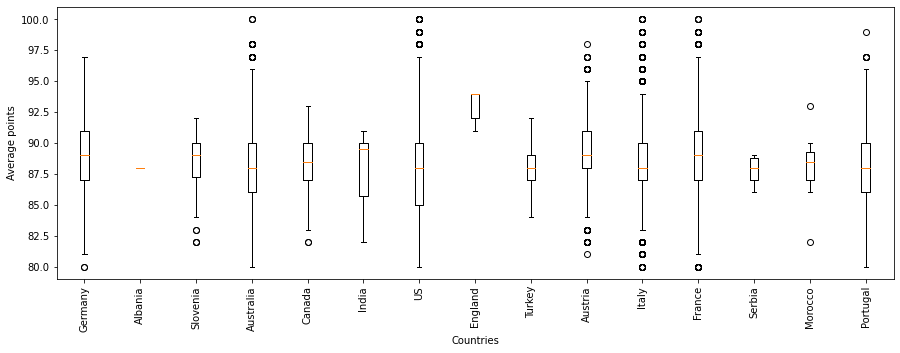

In [22]:
fig, ax = plt.subplots(figsize=(15, 5))

for i, x in enumerate(df_top15['country'].unique()):
    ax.boxplot(df_top15[df_top15['country'] == x]['points'], labels=[str(x)], positions=[i])

plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Average points')
plt.show()

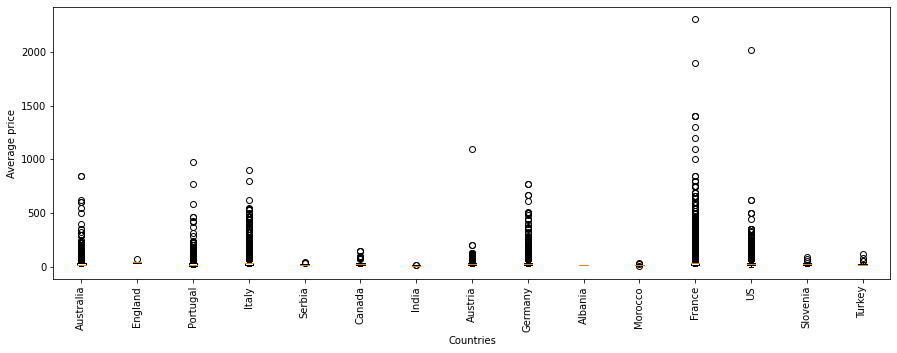

In [23]:
fig, ax = plt.subplots(figsize=(15, 5))

for i, x in enumerate(df_top15['country'].unique()):
    ax.boxplot(df_top15[df_top15['country'] == x]['price'], labels=[str(x)], positions=[i])

plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Average price')
plt.show()
    

As expected the distribution of the price didn't add much value as the price of wine has a lot of outliers. 

*Note: it an be a nice challenge to do some more data wrangling to remove the outliers of the dataset.* 

## Time to go lazy

The lazy API offers a way to optimise your queries, similar to Spark. Major benefit over spark is that we don't have to setup our environment and can therefore continue working from our notebook.

More information can be found in the [Polars-book](https://ritchie46.github.io/polars-book/lazy_polars/intro.html)

In [24]:
from polars.lazy import *

In [25]:
lazy_df = pl.scan_csv('winemag-data.csv', ignore_errors=True)
print(type(lazy_df))

<class 'polars.lazy.LazyFrame'>


As we can see nothing happens right away. From the documentation: '_This is due to the lazyness, nothing will happend until specifically requested. This allows Polars to see the whole context of a query and optimize just in time for execution._'

Printing the type returns 'polars.lazy.LazyFrame' indicating the data is available to us.

In [26]:
lazy_df = (
    lazy_df
    .filter(col('country').str_lengths() > 0)
    .filter(col('country').str_contains(r'US-France').is_not())
)

Similar to the filters that we did with the eager API we are filtering out the unknown and 'US-France' values in the `country` variable. Still nothing is returned by Polars.

On to the groupby `country` and find the average `points` to compare with the eager API that we used earlier.

In [27]:
 lazy_df = (
    lazy_df
    .groupby('country')
    .agg([pl.mean('points').alias('avg_points')])
    .sort("avg_points", reverse=True)
)

As we can see the syntax of the lazy API is different from what we did in the beginning. Although it takes some getting used to the syntax gives a nice overview on the different steps we want to take. 

To actually see the results we can do two things: `collect()` and `fetch()`. The difference is that fetch takes the first 500 results and then runs the query, whereas collect runs the query over all the results. Below we can see the differences for our case.

In [28]:
lazy_df.collect()

country,avg_points
str,f64
"""England""",92.889
"""Austria""",89.277
"""France""",88.894
"""Germany""",88.626
"""Italy""",88.41
"""Canada""",88.24
"""Slovenia""",88.234
"""Morocco""",88.167
"""Turkey""",88.096


In [29]:
lazy_df.fetch()

country,avg_points
str,f64
"""Morocco""",93
"""Australia""",91
"""Israel""",91
"""Germany""",90.167
"""Canada""",90
"""Hungary""",90
"""Moldova""",90
"""Chile""",89
"""Greece""",89


In [30]:
print(f'The length of collect() is {len(lazy_df.collect())}')
print(f'The length of fetch() is {len(lazy_df.fetch())}')

The length of collect() is 47
The length of fetch() is 19


## Output

We have got the output that we are looking for. Polars offers several ways to output our analyses, even to other formats useful for further analyses (e.g. pandas dataframe (`to_pandas()`) or numpy arrays (`to_numpy()`)).

In [31]:
lazy_df.collect().to_csv('results.csv')

## Final word


Polars is a new package that is gaining a lot of attention. At the time of writing this article it has gathered more than 1300 stars on Github, which is impressive looking at the fact that is around less than a year. It offers almost all functions that we need to manipulate our Dataframe. Next to that it offers a lazy API that helps us optimising our queries before we execute them. Although we didn't touch it is in this article, the benchmark of H20 shows that it super efficient and fast. Especially with larger datasets it becomes worthwile to look into the benefits that the lazy API has to offer.

I hope this article showed some of the potential Polars has to offer. There is a lot more to explore. The developer behind Polars is very responsive on issues. For (beginning) open source developers there are plenty of opportunities to contribute, both on the Python and Rust side. 

[link to Polars github page](https://github.com/ritchie46/polars)